# Titanic Survivor Prediction
1. I am tasked to predict if a passenger survives the Titanic incident based on several factors
2. The dataset is readily available in two different files. One for training dataset, one for testing dataset.
3. I will carry out my machine learning workflow process to create a model that can solve this problem according to guidlines below:

    A. Problem formulation:
    
        I.  Reading and understand the question carefully
        II. Formulate the problem in machine learning terms.
        III.Check the data if it has label or not.

    B. Data Preparation (applying these steps only if they're necessary):

        I.  Data Loading
        II. Exploratory Data Analysis --> Most important, check for missing values and complete duplicates
        III.Data Cleaning --> Clean up any missing values, duplicates, and data inconsistencies
        IV. Data Preprocessing --> Carry out data transformation (category to one-hot,data normalization)

    C. Model Development:
    
        I.  Model Selection --> Test out different models and select the model with best performance
        II. Hyperparameter tuning --> Apply grid search CV on my selected model. (Optional) Try to use K-fold CV to further validate my model.
        III.Model Evaluation --> Evaluate my model by looking at the correct evaluation metrics.
                
    D. Model Deployment --> Perform prediction using my model


In [1]:
# Import necessary modules
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Load datasets
train_df = pd.read_csv('titanic/input/train.csv')
test_df = pd.read_csv('titanic/input/test.csv')

I will be doing some Exploratory Data Analysis to understand the data and to get use to the data that I will use for the model creation and prediction.

In [3]:
print(train_df.columns.values)
print(train_df.head())
print(test_df.columns.values)
print(test_df.head())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3

Plotting a density plot between survival rate and fare to try to see if passengers who paid a higher fare has a higher survivability.

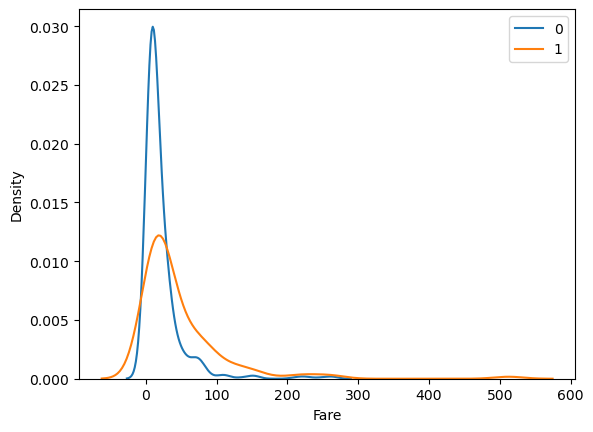

In [4]:
survival = train_df['Survived'] == 0
sns.kdeplot(train_df['Fare'][survival])
sns.kdeplot(train_df['Fare'][~survival])
plt.legend(train_df['Survived'])
plt.show()

Relationship plot between survival rate and passenger class to further prove and strengthen my earlier theory that passengers who paid more are more likely to survive.

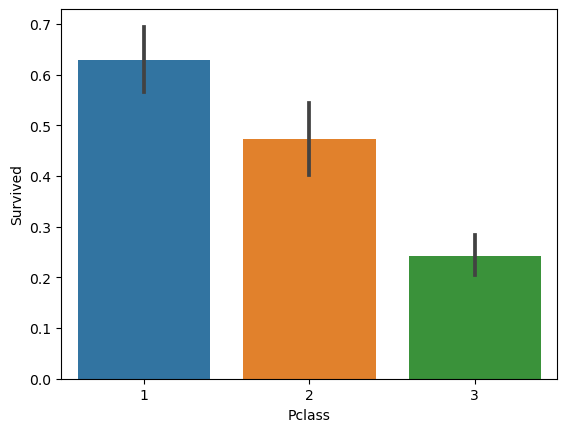

In [5]:
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.show()

A density plot between survival rate and age to try to see if age has any huge effect on a passenger's ability to survive.

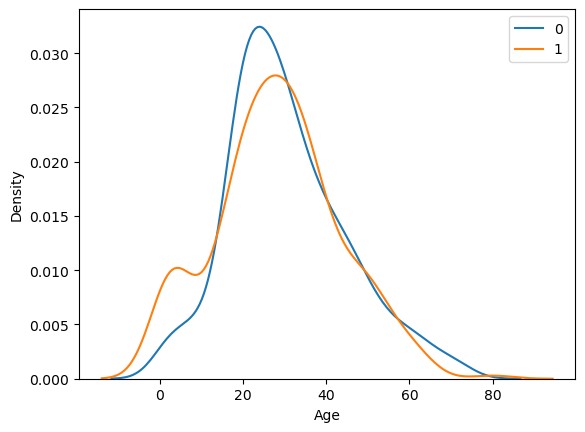

In [6]:
sns.kdeplot(train_df['Age'][survival])
sns.kdeplot(train_df['Age'][~survival])
plt.legend(train_df['Survived'])
plt.show()

Relationship plot between survival rate and embarked location to try and see if a passenger's embarked location played any role in their survivability.

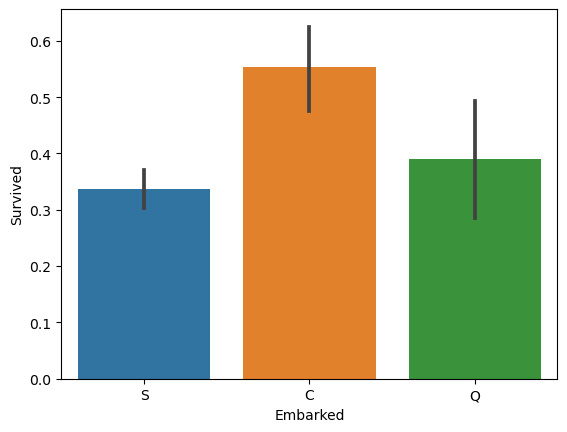

In [7]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)
plt.show()

In [8]:
## Data size
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [9]:
## Data type
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [10]:
## Data describe
print(train_df.describe())
print(test_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

Exploring the data for any null values and duplication, and doing data cleaning wherever needed in order to make sure that the data is ready to be use for the model that will be build later.

In [11]:
## Null values
print(train_df.isna().sum())
print('-'*20)
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Plotting the missing values to better see how the missing data is distributed

<AxesSubplot:>

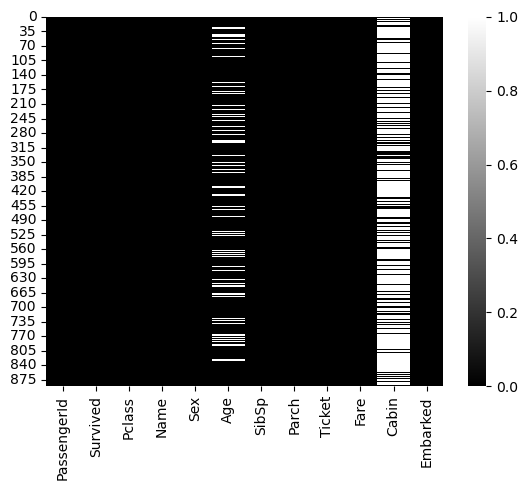

In [12]:
sns.heatmap(train_df.isna(), cmap='gray')

Plotting the distribution plot for 'Age' column in order to see the pattern of data and seeing if I'm able to fill the missing values with either the mean or median of the data. With plot being  left-skewed, I decided to use the median for the missing values.

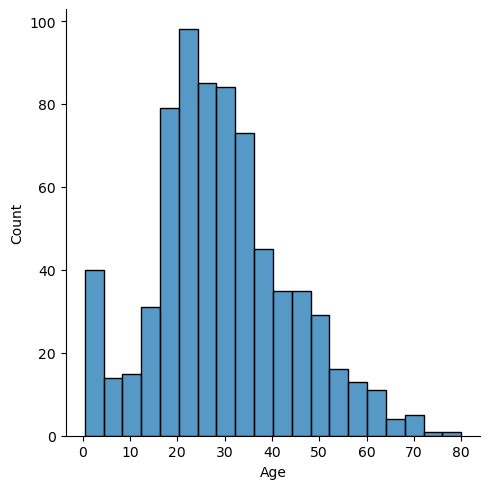

In [13]:
sns.displot(train_df['Age'])
plt.show()

In [14]:
### Getting the mean and median for Age in train and test data
print(train_df['Age'].mean())
print(test_df['Age'].mean())
print(train_df['Age'].median())
print(test_df['Age'].median())

29.69911764705882
30.272590361445783
28.0
27.0


Plotting the distribution for 'Embarked' column to see how the values are distributed and if I'm able to just use the majority value for the missing values in 'Embarked'

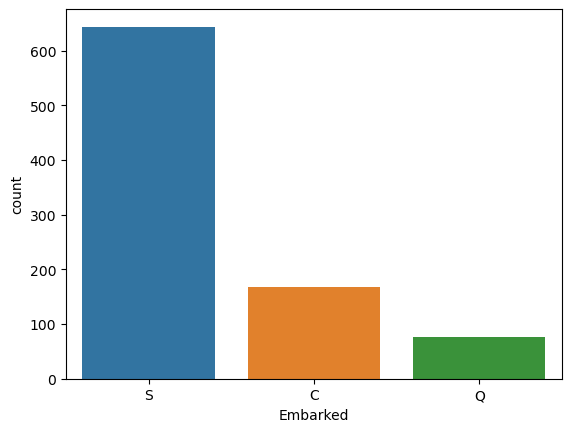

In [15]:
sns.countplot(x='Embarked', data=train_df)
plt.show()

I then filled in the missing values according to what I had gathered previously, filling the missing values in the 'Age' column with the median values and filling the missing values in the 'Embarked' column with the mode value, 'S'. 

I also filled in the one missing value in the 'Fare' column from the test dataset with the mean value. 

Finishing things up, I decided to drop the 'Cabin' column as there is just too much missing values in both the train and test datasets.

In [16]:
### Fill in Age with median value and Embarked with the mode, 'S'
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

### Drop Cabin as the column has too much null value
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

### Fill in the 1 null value in Fare with the mean value
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [17]:
### Recheck the data for null values
print(train_df.isna().sum())
print('-'*20)
print(test_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
## Duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


C:\Users\Clarus\AppData\Local\Temp\ipykernel_19436\669203530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train_df.corr()


<AxesSubplot:>

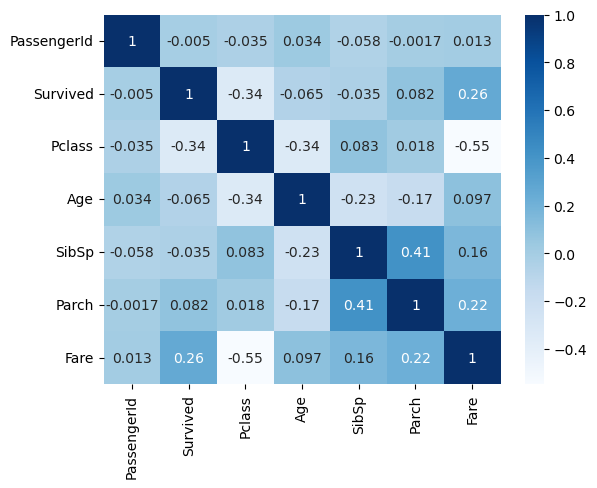

In [19]:
# Data correlation
train_corr = train_df.corr()
sns.heatmap(data=train_corr, cmap='Blues', annot=True)

After finishing with the EDA and the Data Cleaning, I did a one-hot encode for categorical data in the dataset, the 'Pclass', 'Sex', and 'Embarked' columns using the get_dummies function from the Pandas moduled.

I them start the data preprocessing by doing a train-test-split on the train dataset, just so that I will be able to obtain a score during my model selection.

In [20]:
# Data preprocessing
print(train_df.head())

## Dropping unneeded column such as PassengerID, Name & Ticket
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## Encode the categorical data such as Pclass, Sex & Embarked
print(train_df['Sex'].unique(), train_df['Pclass'].unique())
train_df = pd.get_dummies(data=train_df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
['male' 'female'] [3 1 2]


In [21]:
## Split train data
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

After splitting the data, I then did a model and scaler selection to choose the best model and scaler to be use wth this dataset. I then decided to go with the Standard Scaler + Random Forest Classifier.

In [22]:
# Model & Scaler selection
from sklearn.pipeline import Pipeline

scalers = [StandardScaler(), MinMaxScaler()]
models = [LogisticRegression(random_state=100), DecisionTreeClassifier(random_state=100), RandomForestClassifier(random_state=100), SVC(random_state=100)]
scores = []
best_score = ['', '', 0]

for scaler in scalers:
    for model in models:
        steps = [
            ('scaler', scaler),
            ('model', model)
        ]
        pipeline = Pipeline(steps)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.score(X_test, y_test)
        scores.append([scaler, model, y_pred])

for score in scores:
    print(score)
    if score[2] > best_score[2]:
        best_score = score

print('Best model is {} + {} with a score of {}'.format(best_score[0], best_score[1], best_score[2]))

[StandardScaler(), LogisticRegression(random_state=100), 0.8295964125560538]
[StandardScaler(), DecisionTreeClassifier(random_state=100), 0.7802690582959642]
[StandardScaler(), RandomForestClassifier(random_state=100), 0.8475336322869955]
[StandardScaler(), SVC(random_state=100), 0.8475336322869955]
[MinMaxScaler(), LogisticRegression(random_state=100), 0.8161434977578476]
[MinMaxScaler(), DecisionTreeClassifier(random_state=100), 0.7802690582959642]
[MinMaxScaler(), RandomForestClassifier(random_state=100), 0.8475336322869955]
[MinMaxScaler(), SVC(random_state=100), 0.8251121076233184]
Best model is StandardScaler() + RandomForestClassifier(random_state=100) with a score of 0.8475336322869955


After selecting the model, I did a hyperparameter tuning on the model using a GridSearchCV to see if I can improve the score any further.

In [23]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

best_pipeline = Pipeline([
    ('scaler', best_score[0]),
    ('model', best_score[1])
])

parameters = {
    'model__min_samples_split': [2, 6, 10],
    'model__min_samples_leaf': [3, 4, 5],
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__ccp_alpha': [0.0, 0.1, 0.5]
}

grid = GridSearchCV(best_pipeline, parameters, scoring = 'accuracy')
grid.fit(X_train, y_train)

print(grid.score(X_test, y_test))
print(grid.best_params_)
print(grid.best_score_)

0.852017937219731
{'model__ccp_alpha': 0.0, 'model__criterion': 'entropy', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
0.8248905846706318


I then did a simple evaluation for the model and used the model for a prediction on the test dataset.

I then exported the csv file of the prediction with the required columns according to the instruction from the Kaggle site.

In [24]:
# Model evaluation
y_pred = grid.predict(X_test)

print('Score:', grid.score(X_test, y_test))
print('Confusion matrix:\n', confusion_matrix(y_pred, y_test))
print('Classification report:\n', classification_report(y_pred, y_test))

# Unseen data prediction
prediction = grid.predict(test_df)
prediction_passengers_id = pd.read_csv('titanic/input/test.csv')['PassengerId']
prediction_passengers_id = pd.concat([prediction_passengers_id, pd.DataFrame(prediction, columns=['Survived'])], axis=1)
print(prediction_passengers_id)

Score: 0.852017937219731
Confusion matrix:
 [[137  23]
 [ 10  53]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       160
           1       0.70      0.84      0.76        63

    accuracy                           0.85       223
   macro avg       0.81      0.85      0.83       223
weighted avg       0.87      0.85      0.86       223

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [26]:
# Exporting PassengerId & Survived prediction to be upload to Kaggle website for prediction score
with open('titanic/output/titanic_prediction.csv', 'wb') as f:
    prediction_passengers_id.to_csv(f, index=False)